In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

%matplotlib inline

In [5]:
df = pd.read_csv("data/train.csv")

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().mean().round(2) * 100

SalesID                      0.0
SalePrice                    0.0
MachineID                    0.0
ModelID                      0.0
datasource                   0.0
auctioneerID                 5.0
YearMade                     0.0
MachineHoursCurrentMeter    64.0
UsageBand                   83.0
saledate                     0.0
fiModelDesc                  0.0
fiBaseModel                  0.0
fiSecondaryDesc             34.0
fiModelSeries               86.0
fiModelDescriptor           82.0
ProductSize                 53.0
fiProductClassDesc           0.0
state                        0.0
ProductGroup                 0.0
ProductGroupDesc             0.0
Drive_System                74.0
Enclosure                    0.0
Forks                       52.0
Pad_Type                    80.0
Ride_Control                63.0
Stick                       80.0
Transmission                54.0
Turbocharged                80.0
Blade_Extension             94.0
Blade_Width                 94.0
Enclosure_

In [21]:
df1 = df[df["YearMade"] >= 1940]

In [22]:
np.log(df["SalePrice"])

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [23]:
df1["Age"] = (df["saledate"].map(lambda x: int(x.split(" ")[0][-4:])))-df["YearMade"]

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df1 = df1[df1["Age"]>0]

In [39]:
df1

,SalePrice,Age
0,66000,2
1,57000,8
2,10000,3
3,38500,10
4,11000,2
...,...,...
401120,10500,6
401121,11000,6
401122,11500,6
401123,9000,6


In [40]:
df1["SalePrice_log"] = np.log(df1["SalePrice"])
df1

,SalePrice,Age,SalePrice_log
0,66000,2,11.097410
1,57000,8,10.950807
2,10000,3,9.210340
3,38500,10,10.558414
4,11000,2,9.305651
...,...,...,...
401120,10500,6,9.259131
401121,11000,6,9.305651
401122,11500,6,9.350102
401123,9000,6,9.104980


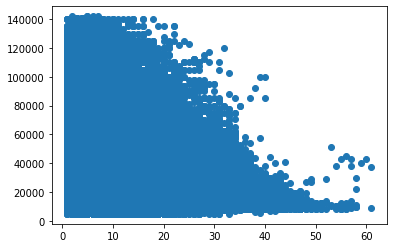

In [42]:
plt.scatter(df1["Age"], df1["SalePrice"])

In [27]:
df1 = df1.loc[:,["SalePrice", "Age"]].copy()

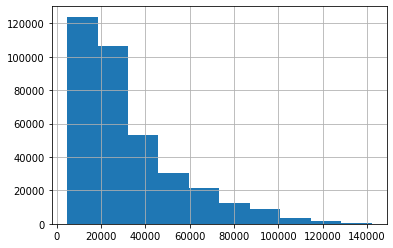

In [28]:
df1.SalePrice.hist()

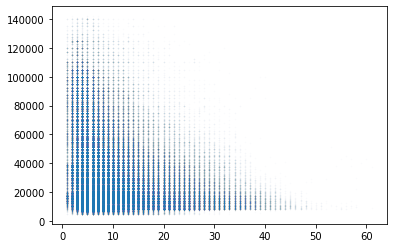

In [29]:
plt.scatter(df1["Age"],df1["SalePrice"], s=1, alpha=0.01)

In [30]:
X = sm.add_constant(df1["Age"])
X

/Users/chulgyukim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age
0,1.0,2
1,1.0,8
2,1.0,3
3,1.0,10
4,1.0,2
...,...,...
401120,1.0,6
401121,1.0,6
401122,1.0,6
401123,1.0,6


In [43]:
y = df1["SalePrice"]
y_log = df1["SalePrice_log"]
y

0         66000
1         57000
2         10000
3         38500
4         11000
          ...  
401120    10500
401121    11000
401122    11500
401123     9000
401124     7750
Name: SalePrice, Length: 362235, dtype: int64

In [44]:
yearmade_model = sm.OLS(y,X)
yearmade_results = yearmade_model.fit()
yearmade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                 2.415e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:28:18   Log-Likelihood:            -4.1466e+06
No. Observations:              362235   AIC:                         8.293e+06
Df Residuals:                  362233   BIC:                         8.293e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.025e+04     63.972    629.123      0.000    4.01e+04    4.04e+04
Age         -787.3016      5.066   -155.400      0.000    -797.231    -777.372
==============================================================================
Omnibus:                    80523.197   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159559.939
Skew:                           1.348   Prob(JB):                         0.00
Kurtosis:                       4.816   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
yearmade_results.params

const    40246.194282
Age       -787.301561
dtype: float64

In [46]:
const, year = yearmade_results.params

In [47]:
yearmade_results.params

const    40246.194282
Age       -787.301561
dtype: float64

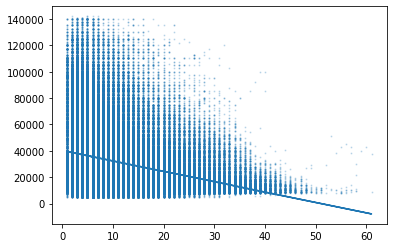

In [48]:
plt.scatter(df1["Age"], df1["SalePrice"], s=1, alpha=0.2)
plt.plot(df1["Age"], df1["Age"].map(lambda x: (year*x)+const))
plt.show()

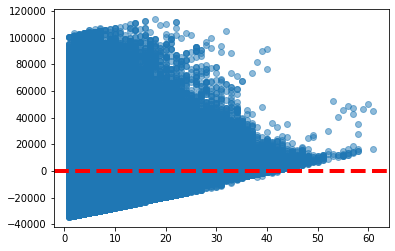

In [49]:
plt.scatter(df1["Age"], yearmade_results.resid, alpha=0.5)
plt.axhline(0,color='red', linewidth=4, linestyle='--')

In [50]:
classifier = Ridge()
model = classifier.fit(X,y)

In [ ]:
def custom_metric(y_test, y_pred):
    np.log(y_test+1) - np.log